# K-Means Algorithms

## Loading Algorithms

In [15]:
# Pure Python Algorithm
from pure_python import PP_KMeans

# numpy and numexpr algorithm
from numpy_and_numexpr import NN_KMeans

# cython algorithm
from kmeans_cy import Cy_KMeans

## Measuring with timeit, cProfile, and memory_profiler

### Pure Python

This is how the algorithm trains with the data:

In [16]:
import random

# Generate 30,000 data points with values similar to the given example
pp_data = [[random.randint(0, 100), random.randint(0, 100)] for _ in range(30000)]
# Create cluster
pp_kmeans = PP_KMeans(k=5)
pp_kmeans.fit(pp_data)

print("Final Centroids:", pp_kmeans.centroids)

Final Centroids: [[50.11563295 74.95871649]
 [49.84986705 23.91797914]]


#### timeit
Now we'll be measuring the time it takes to be executed using timeit in console and we'll put a cell for you to compare your results:

**Console**

To measure the time we created code in a test.py to make it easier:
```
import random
import timeit
from pure_python import PP_KMeans

# Generate data points
pp_data = [[random.randint(0, 100), random.randint(0, 100)] for _ in range(30000)]

# Create a cluster instance
pp_kmeans = PP_KMeans(k=5)

# Measure the time it takes to fit the data
time_taken = timeit.timeit('pp_kmeans.fit(pp_data)', globals=globals(), number=10)
print(f"Time taken: {time_taken/10} seconds")
```

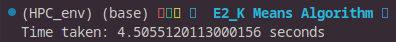

**Notebook**

Now, run this cell and compare the time it takes in your computer running the code:

In [17]:
import timeit
# Measure the time it takes to fit the data
time_taken = timeit.timeit('pp_kmeans.fit(pp_data)', globals=globals(), number=10)
print(f"Time taken: {time_taken/10} seconds")

Time taken: 3.413270471800206 seconds


#### cProfile
Now we'll be measuring the time it takes to run every function on the code in console and we'll put a cell for you to compare your results:

**Console**

We used this code in a test.py to make it easier:
```
import cProfile
import pstats
import random
from pure_python import PP_KMeans

# Generate data points
pp_data = [[random.randint(0, 100), random.randint(0, 100)] for _ in range(30000)]

# Create a cluster instance
pp_kmeans = PP_KMeans(k=5)

# Create a Profile object
pr = cProfile.Profile()
pr.enable()

# Execute the function you want to profile
pp_kmeans.fit(pp_data)

pr.disable()

# Create a Stats object from the Profile object and sort the results by cumulative time
ps = pstats.Stats(pr).sort_stats('cumulative')

# Print the stats to the console
ps.print_stats()
```

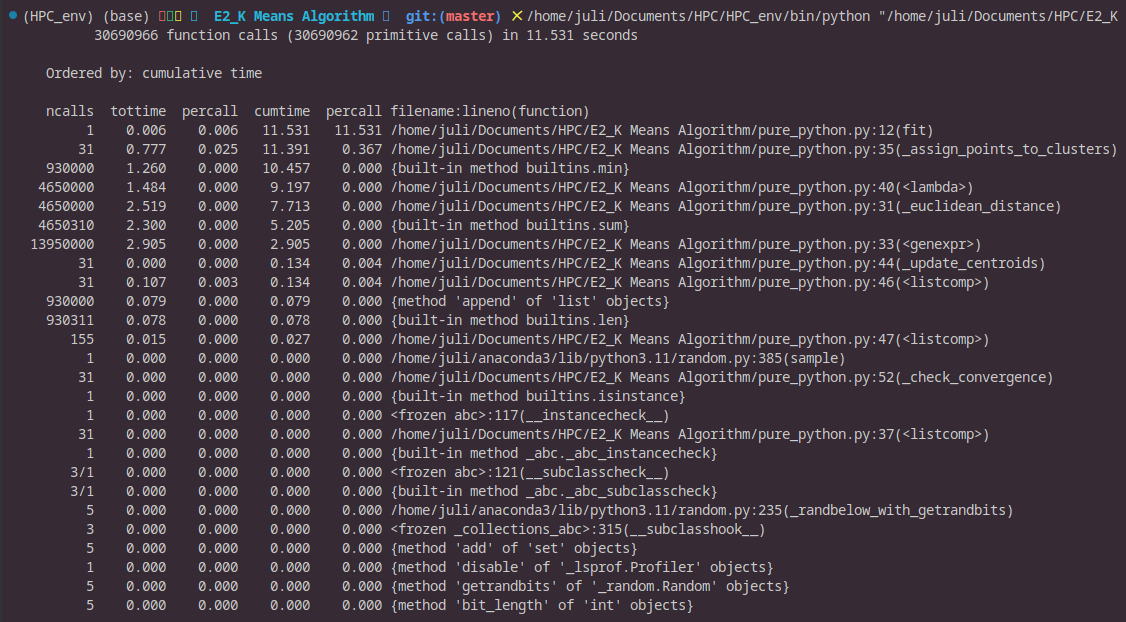

**Notebook**

Now, run this cell and compare the time it takes in your computer running the code:

In [29]:
import cProfile
import pstats
import io

# Create a Profile object
pr = cProfile.Profile()
pr.enable()

# Execute the function you want to profile
pp_kmeans.fit(pp_data)

pr.disable()

# Create a StringIO object to capture the profiling output
s = io.StringIO()

# Create a Stats object from the Profile object and sort the results by cumulative time
ps = pstats.Stats(pr, stream=s).sort_stats('cumulative')

# Print the stats to the StringIO stream
ps.print_stats()

# Now, print the captured output, which contains the profiling results
print(s.getvalue())

         28710934 function calls in 12.142 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   12.142    6.071 /home/juli/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3490(run_code)
        2    0.000    0.000   12.142    6.071 {built-in method builtins.exec}
        1    0.000    0.000   12.142   12.142 /tmp/ipykernel_318377/1401821490.py:1(<module>)
        1    0.007    0.007   12.142   12.142 /home/juli/Documents/HPC/E2_K Means Algorithm/pure_python.py:12(fit)
       29    0.829    0.029   11.655    0.402 /home/juli/Documents/HPC/E2_K Means Algorithm/pure_python.py:35(_assign_points_to_clusters)
   870000    1.282    0.000   10.665    0.000 {built-in method builtins.min}
  4350000    1.503    0.000    9.383    0.000 /home/juli/Documents/HPC/E2_K Means Algorithm/pure_python.py:40(<lambda>)
  4350000    2.590    0.000    7.880    0.000 /home/juli/Documents/HPC/E2_K Me

#### memory_profiler
Now we'll be measuring the memory usage it takes in console and we'll put a cell for you to compare your results:

**Console**

We used this code in a test.py to make it easier:
```
from memory_profiler import profile
import random
from pure_python import PP_KMeans

# Generate data points
pp_data = [[random.randint(0, 100), random.randint(0, 100)] for _ in range(30000)]
# Create a cluster instance
pp_kmeans = PP_KMeans(k=5)

@profile
def run_kmeans():
    # Execute the method you want to profile
    pp_kmeans.fit(pp_data)

if __name__ == "__main__":
    run_kmeans()
```

![image.png](attachment:image.png)

**Notebook**

Now, run this cell and compare the memory usage it takes in your computer running the code:

In [21]:
%memit pp_kmeans.fit(pp_data)

peak memory: 145.83 MiB, increment: 0.00 MiB


### NumPy and numexpr algorithm

This is how the algorithm trains with the data:

In [26]:
import numpy as np

nn_data = np.random.randint(0, 101, size=(30000, 2))  # Using numpy to generate data directly
nn_kmeans = NN_KMeans(k=2)
nn_kmeans.fit(data)
print("Final Centroids:", nn_kmeans.centroids)

Final Centroids: [[24.77498169 50.22195593]
 [75.2566927  49.48754924]]


#### timeit

**Console**

To measure the time we created code in a test.py to make it easier:
```
import numpy as np
import timeit
from numpy_and_numexpr import NN_KMeans

# Generate data points
nn_data = np.random.randint(0, 101, size=(30000, 2))  # Using numpy to generate data directly

# Create a cluster instance
nn_kmeans = NN_KMeans(k=5)

# Measure the time it takes to fit the data
time_taken = timeit.timeit('nn_kmeans.fit(nn_data)', globals=globals(), number=10)
print(f"Time taken: {time_taken/10} seconds")
```

![image.png](attachment:image.png)

In [27]:
# Measure the time it takes to fit the data
time_taken = timeit.timeit('nn_kmeans.fit(nn_data)', globals=globals(), number=10)
print(f"Time taken: {time_taken/10} seconds")

Time taken: 0.035347189599997365 seconds


#### cProfile
Now we'll be measuring the time it takes to run every function on the code in console and we'll put a cell for you to compare your results:

**Console**

We used this code in a test.py to make it easier:
```
import cProfile
import pstats
import random
from pure_python import PP_KMeans

# Generate data points
nn_data = np.random.randint(0, 101, size=(30000, 2))  # Using numpy to generate data directly

# Create a cluster instance
nn_kmeans = NN_KMeans(k=5)

# Create a Profile object
pr = cProfile.Profile()
pr.enable()

# Execute the function you want to profile
nn_kmeans.fit(nn_data)

pr.disable()

# Create a Stats object from the Profile object and sort the results by cumulative time
ps = pstats.Stats(pr).sort_stats('cumulative')

# Print the stats to the console
ps.print_stats()
```

![image-3.png](attachment:image-3.png)

**Notebook**

Now, run this cell and compare the time it takes in your computer running the code:

In [30]:
# Create a Profile object
pr = cProfile.Profile()
pr.enable()

# Execute the function you want to profile
nn_kmeans.fit(nn_data)

pr.disable()

# Create a StringIO object to capture the profiling output
s = io.StringIO()

# Create a Stats object from the Profile object and sort the results by cumulative time
ps = pstats.Stats(pr, stream=s).sort_stats('cumulative')

# Print the stats to the StringIO stream
ps.print_stats()

# Now, print the captured output, which contains the profiling results
print(s.getvalue())

         2411 function calls (2336 primitive calls) in 0.063 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.062    0.031 /home/juli/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3490(run_code)
        2    0.000    0.000    0.062    0.031 {built-in method builtins.exec}
        1    0.000    0.000    0.062    0.062 /tmp/ipykernel_318377/977514176.py:1(<module>)
        1    0.003    0.003    0.062    0.062 /home/juli/Documents/HPC/E2_K Means Algorithm/numpy_and_numexpr.py:11(fit)
       15    0.018    0.001    0.034    0.002 /home/juli/Documents/HPC/E2_K Means Algorithm/numpy_and_numexpr.py:30(<listcomp>)
       30    0.000    0.000    0.015    0.001 {method 'mean' of 'numpy.ndarray' objects}
       30    0.001    0.000    0.015    0.000 /home/juli/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:164(_mean)
       75    0.013    0.000    0.013    0.0

#### memory_profiler
Now we'll be measuring the memory usage it takes in console and we'll put a cell for you to compare your results:

**Console**

We used this code in a test.py to make it easier:
```
from memory_profiler import profile
import numpy as np
from numpy_and_numexpr import NN_KMeans

# Generate data points
nn_data = np.random.randint(0, 101, size=(30000, 2))  # Using numpy to generate data directly

# Create a cluster instance
nn_kmeans = NN_KMeans(k=5)

@profile
def run_kmeans():
    # Execute the method you want to profile
    nn_kmeans.fit(nn_data)

if __name__ == "__main__":
    run_kmeans()
```

![image.png](attachment:image.png)

**Notebook**

Now, run this cell and compare the memory usage it takes in your computer running the code:

In [31]:
%memit nn_kmeans.fit(nn_data)

peak memory: 146.84 MiB, increment: 0.00 MiB


### Cython

This is how the algorithm trains with the data:

In [36]:
cy_data = np.random.randint(0, 101, size=(30000, 2))

cy_kmeans = Cy_KMeans(k=2)
cy_kmeans.fit(cy_data)
print("Final Centroids:", cy_kmeans.centroids)

Final Centroids: [[25.29775838 50.03121074]
 [75.63057068 50.10237279]]


#### timeit
Now we'll be measuring the time it takes to be executed using timeit in console and we'll put a cell for you to compare your results:

**Console**

To measure the time we created code in a test.py to make it easier:
```
import numpy as np
import timeit
from kmeans_cy import Cy_KMeans

# Generate data points
cy_data = np.random.randint(0, 101, size=(30000, 2))

# Create a cluster instance
cy_kmeans = Cy_KMeans(k=5)

# Measure the time it takes to fit the data
time_taken = timeit.timeit('cy_kmeans.fit(cy_data)', globals=globals(), number=10)
print(f"Time taken: {time_taken/10} seconds")
```

![image.png](attachment:image.png)

**Notebook**

Now, run this cell and compare the time it takes in your computer running the code:

In [37]:
# Measure the time it takes to fit the data
time_taken = timeit.timeit('cy_kmeans.fit(cy_data)', globals=globals(), number=10)
print(f"Time taken: {time_taken/10} seconds")

Time taken: 0.04652064920010161 seconds


#### cProfile
Now we'll be measuring the time it takes to run every function on the code in console and we'll put a cell for you to compare your results:

**Console**

We used this code in a test.py to make it easier:
```
import numpy as np
import cProfile
import pstats
from kmeans_cy import Cy_KMeans

# Generate data points
cy_data = np.random.randint(0, 101, size=(30000, 2))

# Create a cluster instance
cy_kmeans = Cy_KMeans(k=5)

# Create a Profile object
pr = cProfile.Profile()
pr.enable()

# Execute the function you want to profile
cy_kmeans.fit(cy_data)

pr.disable()

# Create a Stats object from the Profile object and sort the results by cumulative time
ps = pstats.Stats(pr).sort_stats('cumulative')

# Print the stats to the console
ps.print_stats()
```

![image.png](attachment:image.png)

**Notebook**

Now, run this cell and compare the time it takes in your computer running the code:

In [38]:
# Create a Profile object
pr = cProfile.Profile()
pr.enable()

# Execute the function you want to profile
cy_kmeans.fit(cy_data)

pr.disable()

# Create a StringIO object to capture the profiling output
s = io.StringIO()

# Create a Stats object from the Profile object and sort the results by cumulative time
ps = pstats.Stats(pr, stream=s).sort_stats('cumulative')

# Print the stats to the StringIO stream
ps.print_stats()

# Now, print the captured output, which contains the profiling results
print(s.getvalue())

         2005 function calls (1930 primitive calls) in 0.068 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.068    0.034 /home/juli/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3490(run_code)
        2    0.000    0.000    0.068    0.034 {built-in method builtins.exec}
        1    0.000    0.000    0.068    0.068 /tmp/ipykernel_318377/123190206.py:1(<module>)
        1    0.031    0.031    0.067    0.067 kmeans_cy.pyx:21(fit)
   135/60    0.000    0.000    0.025    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
      105    0.024    0.000    0.024    0.000 {method 'reduce' of 'numpy.ufunc' objects}
       75    0.000    0.000    0.016    0.000 /home/juli/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:69(_wrapreduction)
       30    0.000    0.000    0.016    0.001 <__array_function__ internals>:177(sum)
       30

#### memory_profiler
Now we'll be measuring the memory usage it takes in console and we'll put a cell for you to compare your results:

**Console**

We used this code in a test.py to make it easier:
```
import numpy as np
from memory_profiler import profile
from kmeans_cy import Cy_KMeans

# Generate data points
cy_data = np.random.randint(0, 101, size=(30000, 2))

# Create a cluster instance
cy_kmeans = Cy_KMeans(k=5)

@profile
def run_kmeans():
    # Execute the method you want to profile
    cy_kmeans.fit(cy_data)

if __name__ == "__main__":
    run_kmeans()
```

![image.png](attachment:image.png)

**Notebook**

Now, run this cell and compare the memory usage it takes in your computer running the code:

In [39]:
%memit cy_kmeans.fit(cy_data)

peak memory: 147.80 MiB, increment: 0.00 MiB
